# Band reduction in multispectral images

## Libraries importation

First of all, we import all the libraries that we need to use during the mini-project.
* scipy.io: loading dataset in matlab format
* numpy: using mathematical tools on matrix
* matplotlib.pyplot: ploting graphs to represent data
* seaborn: beautifying graphs for better understanding
* MinMaxScaler from sklearn.preprocessing: scaling data on an interval
* PCA from sklearn.decomposition: performing PCA on data

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

## Data loading and preprocessing

Data was downloaded on a [website](http://lesun.weebly.com/hyperspectral-data-set.html) repertoring spectral images. We choose the first image in Matlab format : Indian pines. The loading of the dataset is a bit particular since the the dataset represents an image in Matlab format (.mat). **loadmat** function returns a dictionnary with the different characteristics of the Matlab file and among them the content of the file at key *indian_pines*.

In [2]:
data = sio.loadmat('data/Indian_pines.mat')['indian_pines'] # load dataset
data.shape

(145, 145, 220)

We notice that our dataset is in three dimension : 145x145x220. Indeed, our dataset depicts a square image (150 pixels wide and 150 pixels high) with 220 spectrals band. A tree dimension dataset is not convenient for data processing and analysis, thus we have to reshape it in a more convenient form. The solution here was to "linearize" the matrix of pixels in a vector of pixels so that we obtain a dataset of 21025 (145x145) samples with 220 features.

In [3]:
width, height = data.shape[0], data.shape[1]
data_reshaped = data.reshape(-1, data.shape[-1]) # reshape dataset
data_reshaped.shape

(21025, 220)

Now that our data is well shaped, we want to make sure that our features are scaled before performing PCA since PCA is a variance maximizing exercise. For that, we choose to use the **MinMaxScaler** that scales data between 0 and 1. 

In [4]:
min_max_scaler = MinMaxScaler() 
data_scaled = min_max_scaler.fit_transform(data_reshaped) # scale data 

## PCA performing

It is time to perform PCA. The first step is to determine the number of components that we want to keep after the PCA. PCA goal is to restrain the number of features while trying to conserve the maximum of information. Thus the goal here is to keep the components that have the highest explained variances (and so explained variance ratio). Here, we decide to keep only components that explained at least 1% of the total variance.

In [5]:
pca_test = PCA()
pca_test.fit(data_scaled)
best_explained_variance = pca_test.explained_variance_ratio_[pca_test.explained_variance_ratio_>0.01]
components = best_explained_variance.shape[0]
components

3

Only 3 components explain more than 1% of the variance. Therefore, we can specify that we only want to keep 3 components to perform PCA. A good way to display the computed explained variances is to plot the explained variance ratio of each components.

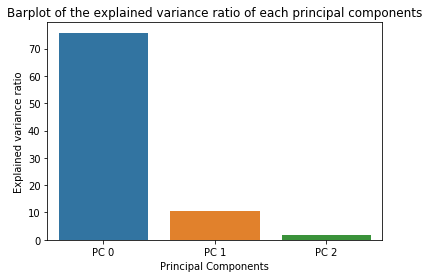

In [6]:
pca = PCA(n_components=components)
data_transformed = pca.fit_transform(data_scaled) # perform PCA
labels = [f"PC {i}" for i in range(components)]
fig = sns.barplot(x=labels, y=pca.explained_variance_ratio_*100)
fig.set(xlabel='Principal Components',  ylabel='Explained variance ratio', title='Barplot of the explained variance ratio of each principal components')
plt.show() # draw bar plot

## Images plotting

After PCA, our data only has 3 features left and we can now display the image with only 3 spectral bands. Before, features need to be scaled between 0 and 1 again to convert them as floats. We use the same scaler as before. 

In [7]:
min_max_scaler = MinMaxScaler()
data_to_plot = min_max_scaler.fit_transform(data_transformed) # scale data

We reshape the data to get for each component a 2-dimensionnal array of size 145x145 that is plotable. Each components corresponds to a range of color. Finally, we "superpose" all 3 components by performing a transformation with the **dstack** function to obtain an array of size 145x145x3. 

In [8]:
data_band1 = data_to_plot[:,0].reshape(width, height, order='F')
data_band2 = data_to_plot[:,1].reshape(width, height, order='F')
data_band3 = data_to_plot[:,2].reshape(width, height, order='F')
data_band = np.dstack([data_band1, data_band2, data_band3])

Ultimately, we divide a plot into four subsections to display the four images described above. 

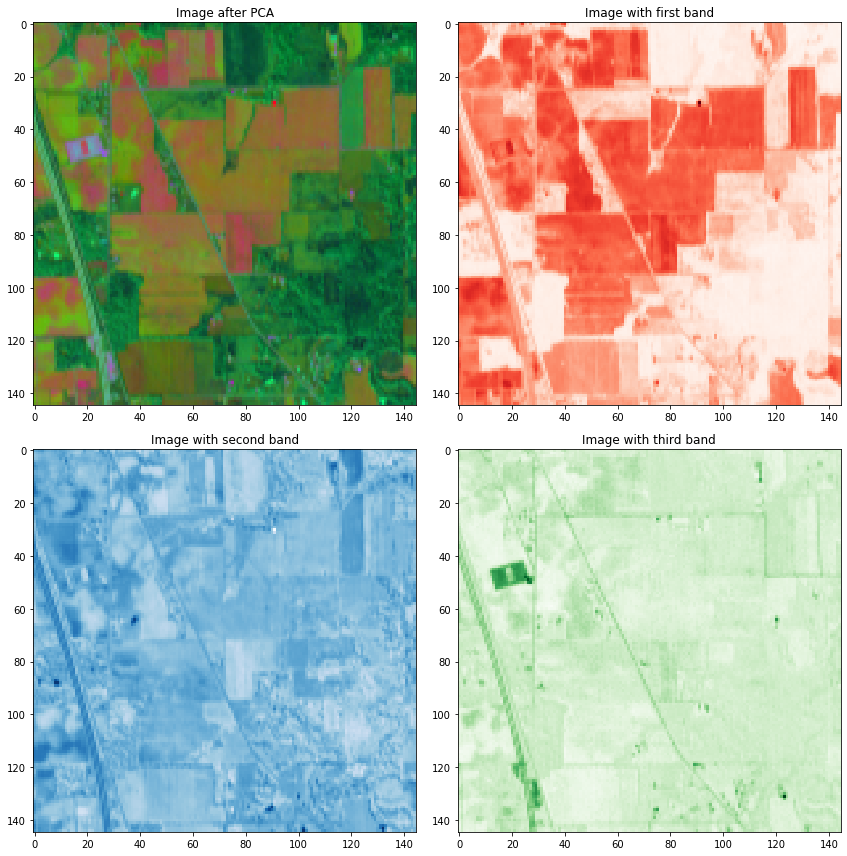

In [9]:
fig, axs = plt.subplots(2, 2, tight_layout=True)
fig.set_size_inches(12, 12)
axs[0][0].imshow(X=data_band)
axs[0][0].set_title('Image with 3 bands')
axs[0][1].imshow(X=data_band1, cmap='Reds')
axs[0][1].set_title('Image with first band')
axs[1][0].imshow(X=data_band2, cmap='Blues')
axs[1][0].set_title('Image with second band')
axs[0][0].set_title('Image after PCA')
axs[1][1].imshow(X=data_band3, cmap='Greens')
axs[1][1].set_title('Image with third band')
plt.show() # draw plot

We notice that the first band (and so the first principal component) is more detailed and more accurate. However some information are only contained by a specific component since we have different details depends on the selected band. From the image with 3 bands, it will then be possible to classify the different areas according to an indian pine specie.